In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_absolute_error, r2_score

# (Indonesia) Multiple Linear Regression - Train on One Country, Test on Another

In [2]:
path = os.getcwd() + "/clean_data/processed_city_temperature_data.csv"
df = pd.read_csv(path)
df.head(50)

,dt,AverageTemperature,City,Country,Latitude,Longitude
0,1743-11-01,6.068,Århus,Denmark,57.05N,10.33E
1,1744-04-01,5.788,Århus,Denmark,57.05N,10.33E
2,1744-05-01,10.644,Århus,Denmark,57.05N,10.33E
3,1744-06-01,14.051,Århus,Denmark,57.05N,10.33E
4,1744-07-01,16.082,Århus,Denmark,57.05N,10.33E
5,1744-09-01,12.781,Århus,Denmark,57.05N,10.33E
6,1744-10-01,7.950,Århus,Denmark,57.05N,10.33E
7,1744-11-01,4.639,Århus,Denmark,57.05N,10.33E
8,1744-12-01,0.122,Århus,Denmark,57.05N,10.33E
9,1745-01-01,-1.333,Århus,Denmark,57.05N,10.33E


In [33]:
df[(df['Latitude'] == '4.02S') & (df['Country'] == 'Indonesia')].head(10)

,dt,AverageTemperature,City,Country,Latitude,Longitude,year,month_offset
234289,1880-01-01,25.968,Ambon,Indonesia,4.02S,127.77E,1880,1
234290,1880-02-01,26.598,Ambon,Indonesia,4.02S,127.77E,1880,2
234291,1880-03-01,27.053,Ambon,Indonesia,4.02S,127.77E,1880,3
234292,1880-04-01,26.346,Ambon,Indonesia,4.02S,127.77E,1880,4
234293,1880-05-01,26.734,Ambon,Indonesia,4.02S,127.77E,1880,5
234294,1880-06-01,25.509,Ambon,Indonesia,4.02S,127.77E,1880,6
234295,1880-07-01,25.113,Ambon,Indonesia,4.02S,127.77E,1880,7
234296,1880-08-01,25.814,Ambon,Indonesia,4.02S,127.77E,1880,8
234297,1880-09-01,25.266,Ambon,Indonesia,4.02S,127.77E,1880,9
234298,1880-10-01,26.268,Ambon,Indonesia,4.02S,127.77E,1880,10


In [3]:
def linear_coefs(X, Y):
  """
  Args:
    X: N x d matrix of input features
    Y: N x 1 matrix (column vector) of output response

  Returns:
    Beta: d x 1 matrix of linear coefficients
  """
  beta = tf.linalg.solve(tf.matmul(tf.transpose(X), X), tf.matmul(tf.transpose(X), Y))  # Return closed form solution (use tf.transpose and tf.mathmul instead of np version)
  return beta

In [4]:
def convert_coordinate(coordinate_string):
    """
    Args:
        coordinate_string: Coordinate with 'N' or 'S' for latitude and 'W' or 'E' for longitude

    Returns:
        relative_coordinate: float representation of coordinate (where 'N' and 'E' are positive)
    """
    if 'S' in coordinate_string or 'W' in coordinate_string:
        relative_coordinate = -float(coordinate_string[:-1]) 
    else:
        relative_coordinate = float(coordinate_string[:-1]) 
        
    return relative_coordinate


In [5]:
def multiple_linear_reg(train_data, input_features, output_features):
    if train_data.empty:
        print(f"No data available for training.")
    else:
        # Training and training plot 
        # Need all datatypes to be the same for tensorflow
        X_train = train_data[input_features].apply(pd.to_numeric).values # Maintain original dimensions (have more than 1 input dimensions now)
        Y_train = train_data[output_features].apply(pd.to_numeric).values.reshape(-1, 1) # Convert to column vectors (stil one output value)

        # Generate linear coefficients on training data (with intercept)
        X_train_with_intercept = tf.concat([X_train, tf.ones([tf.shape(X_train)[0], 1])], axis=1)# Append a dummy feature of ones that is N x 1 (increase dimensionality by 1)
        beta_train_linear = linear_coefs(X_train_with_intercept, Y_train) # Run linear regression on X (including intercept) and outputs Y
        Y_train_prediction = tf.matmul(X_train_with_intercept, beta_train_linear)  # Multiply original inputs X by found features (dot product of input X with parameters produces output Y)

        # Evaluate accuracy of predictions on the training data
        mae_train = mean_absolute_error(Y_train, Y_train_prediction.numpy())
        print(f"Mean Absolute Error (in Celcius): {mae_train}")

        # Evaluate coefficient of determination
        r2_train = r2_score(Y_train, Y_train_prediction.numpy())
        print(f"Coefficient of Determination (r^2): {r2_train}")

        return (X_train, Y_train, Y_train_prediction)

In [25]:
# Compute the month offset (monotonically increasing) from the first date for each city
df['dt'] = pd.to_datetime(df['dt'])
df['month_offset'] = (
    (df['dt'].dt.year - df.groupby('City')['dt'].transform('min').dt.year) * 12
    + (df['dt'].dt.month - df.groupby('City')['dt'].transform('min').dt.month)
    + 1)

df_month = df[['month_offset', 'AverageTemperature', 'City', 'Country', 'Latitude', 'Longitude']]
df_month.loc[:, 'Latitude'] = df_month['Latitude'].apply(convert_coordinate) # Make sure latitude and longitude are numeric (no characters)
df_month.loc[:, 'Longitude'] = df_month['Longitude'].apply(convert_coordinate)
df_month = df_month.reset_index(drop=False)

# Select training data (regression over all the cities in one country)
train_country = "Indonesia"
df_month = df_month[df_month['Country'] == train_country]

#input_features = ['month_offset', 'Latitude', 'Longitude']
input_features = ['month_offset', 'Latitude'] # Try just using latitude (potentially more descriptive than longitude?)
output_features = 'AverageTemperature'
X_train_month, Y_train_month, Y_train_prediction_month = multiple_linear_reg(train_data=df_month, input_features=input_features, output_features=output_features)


Mean Absolute Error (in Celcius): 0.7297278906685049
Coefficient of Determination (r^2): 0.1810361915071771


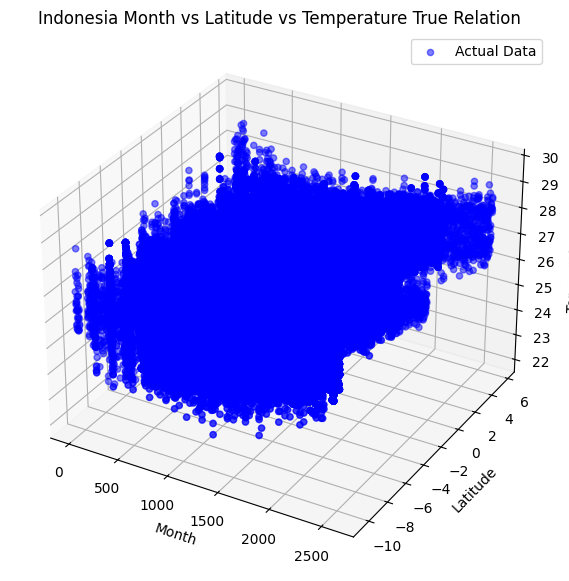

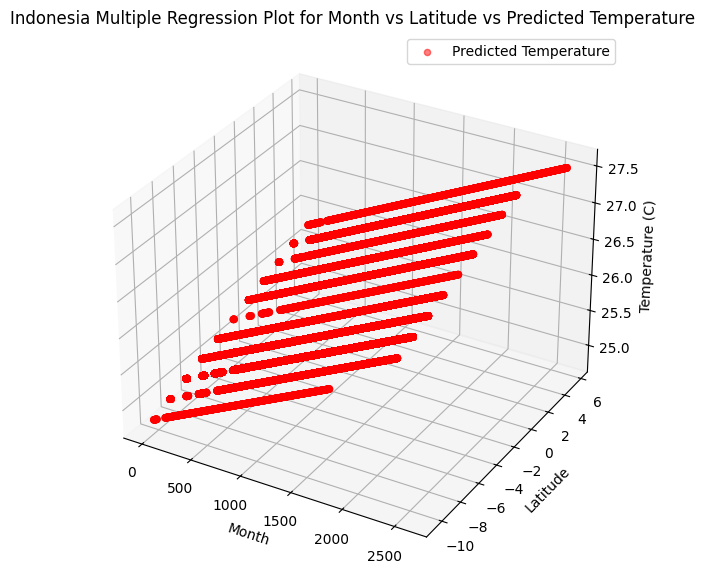

In [26]:
fig_true = plt.figure(figsize=(10, 7))
ax_true = fig_true.add_subplot(111, projection='3d')

# Plot the actual data points (month, latitude, and true average temperature)
ax_true.scatter(
    df_month['month_offset'], 
    df_month['Latitude'], 
    df_month['AverageTemperature'],
    label='Actual Data', 
    color='blue', 
    alpha=0.5
)
ax_true.set_xlabel('Month')
ax_true.set_ylabel('Latitude')
ax_true.set_zlabel('Temperature (C)')
ax_true.legend()
ax_true.set_title(f"{train_country} Month vs Latitude vs Temperature True Relation")
plt.show()

fig_pred = plt.figure(figsize=(10, 7))
ax_pred = fig_pred.add_subplot(111, projection='3d')

# Plot predictions (from above multiple regression)
# X_train_month[:,0] is month and X_train_month[:,1] is latitude
ax_pred.scatter(
    X_train_month[:, 0], 
    X_train_month[:, 1], 
    Y_train_prediction_month.numpy().flatten(),
    label='Predicted Temperature', 
    color='red', 
    alpha=0.5
)
ax_pred.set_xlabel('Month')
ax_pred.set_ylabel('Latitude')
ax_pred.set_zlabel('Temperature (C)')
ax_pred.legend()
ax_pred.set_title(f"{train_country} Multiple Regression Plot for Month vs Latitude vs Predicted Temperature")
plt.show()


In [34]:
print(df_month[['City', 'Latitude']].nunique())
print(df_month['Latitude'].unique())

print(df_month[df_month['Latitude'] == -4.02]) # Some cities have repeated latitudes

City        143
Latitude     11
dtype: int64
[-7.23 -4.02 -0.8 5.63 -8.84 -5.63 4.02 0.8 2.41 -10.45 -2.41]
           index  month_offset  AverageTemperature        City    Country  \
234289    234289             1              25.968       Ambon  Indonesia   
234290    234290             2              26.598       Ambon  Indonesia   
234291    234291             3              27.053       Ambon  Indonesia   
234292    234292             4              26.346       Ambon  Indonesia   
234293    234293             5              26.734       Ambon  Indonesia   
...          ...           ...                 ...         ...        ...   
5753299  5753299          2260              25.856  Prabumulih  Indonesia   
5753300  5753300          2261              26.156  Prabumulih  Indonesia   
5753301  5753301          2262              26.069  Prabumulih  Indonesia   
5753302  5753302          2263              25.104  Prabumulih  Indonesia   
5753303  5753303          2264              2

# (Indonesia) Multiple Linear Regression - Aggregate Over Year

In [ ]:
df['year'] = pd.to_datetime(df['dt']).dt.year

# Define test dataframe
df_year = df[['year', 'AverageTemperature', 'Country', 'City', 'Latitude', 'Longitude']]
df_year.loc[:, 'Latitude'] = df_year['Latitude'].apply(convert_coordinate) # Make sure latitude and longitude are numeric (no characters)
df_year.loc[:, 'Longitude'] = df_year['Longitude'].apply(convert_coordinate)

# Filter outside of function call (this dataset is massive)
train_country = "Indonesia"
df_year = df_year[df_year['Country'] == train_country]
df_year = df_year.groupby(['Country', 'year', 'City']).mean()
df_year = df_year.reset_index(drop=False)

# Select training data (regression over all the cities in one country)
# input_features = ['year', 'Latitude', 'Longitude']
input_features = ['year', 'Latitude'] # Might be more descriptive with just latitude
output_features = 'AverageTemperature'
X_train_year, Y_train_year, Y_train_prediction_year = multiple_linear_reg(train_data=df_year, input_features=input_features, output_features=output_features)

Mean Absolute Error (in Celcius): 0.5933201139657089
Coefficient of Determination (r^2): 0.2874056926922558


In [40]:
print(df_year[['City', 'Latitude']].nunique())
print(df_year['Latitude'].unique())

print(df_year[df_year['Latitude'] == -7.23]) # Some cities have repeated latitudes

#print(df_year[['City', 'Latitude']].unique())

City        143
Latitude     27
dtype: int64
[5.630000000000002 5.630000000000001 -7.230000000000003
 -0.7999999999999999 -4.019999999999999 -8.840000000000002
 -5.630000000000002 4.019999999999999 0.7999999999999999
 -6.430000000000001 2.41 -2.41 -7.2299999999999995 -7.230000000000002
 -4.02 -5.630000000000001 4.02 -6.430000000000002 -7.23 -0.8 -8.84 -5.63
 0.8 -6.4300000000000015 0.8000000000000002 5.63 -10.450000000000001]
        Country  year          City  AverageTemperature Latitude Longitude
303   Indonesia  1840      Adiwerna           25.223750    -7.23    109.46
304   Indonesia  1840  Arjawinangun           23.855250    -7.23    107.84
305   Indonesia  1840  Astanajapura           23.855250    -7.23    107.84
306   Indonesia  1840       Babakan           23.855250    -7.23    107.84
309   Indonesia  1840       Bandung           23.855250    -7.23    107.84
...         ...   ...           ...                 ...      ...       ...
561   Indonesia  1841       Ungaran          

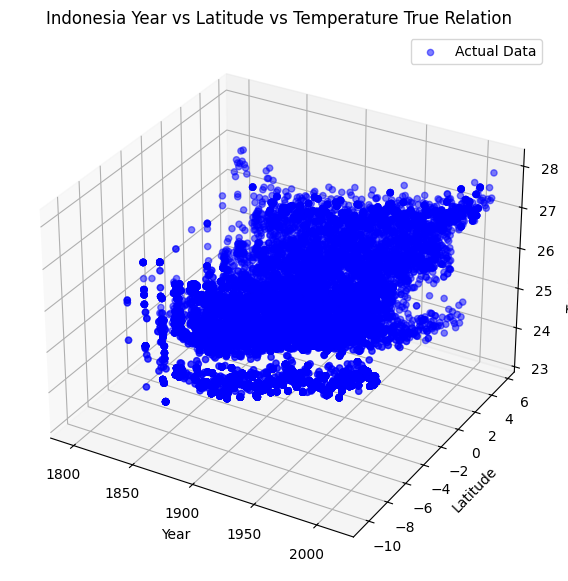

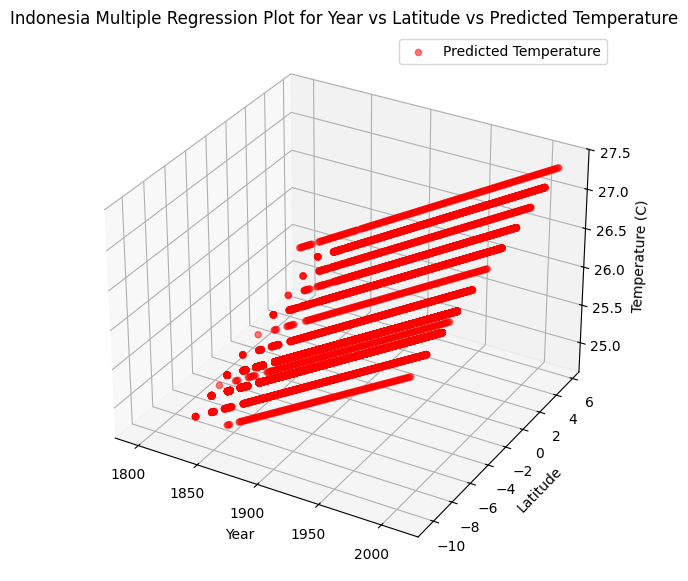

In [7]:
fig_true = plt.figure(figsize=(10, 7))
ax_true = fig_true.add_subplot(111, projection='3d')

# Plot the actual data points (year, latitude, and true average temperature)
ax_true.scatter(
    df_year['year'], 
    df_year['Latitude'], 
    df_year['AverageTemperature'],
    label='Actual Data', 
    color='blue', 
    alpha=0.5
)
ax_true.set_xlabel('Year')
ax_true.set_ylabel('Latitude')
ax_true.set_zlabel('Temperature (C)')
ax_true.legend()
ax_true.set_title(f"{train_country} Year vs Latitude vs Temperature True Relation")
plt.show()

fig_pred = plt.figure(figsize=(10, 7))
ax_pred = fig_pred.add_subplot(111, projection='3d')

# Plot predictions (from above multiple regression)
# X_train_year[:,0] is year and X_train_year[:,1] is latitude
ax_pred.scatter(
    X_train_year[:, 0], 
    X_train_year[:, 1], 
    Y_train_prediction_year.numpy().flatten(),
    label='Predicted Temperature', 
    color='red', 
    alpha=0.5
)
ax_pred.set_xlabel('Year')
ax_pred.set_ylabel('Latitude')
ax_pred.set_zlabel('Temperature (C)')
ax_pred.legend()
ax_pred.set_title(f"{train_country} Multiple Regression Plot for Year vs Latitude vs Predicted Temperature")
plt.show()


# (Indonesia) Multiple Polynomial Regression - Aggregate Over Year

In [57]:
df['year'] = pd.to_datetime(df['dt']).dt.year

# Define test dataframe
df_year = df[['year', 'AverageTemperature', 'Country', 'City', 'Latitude', 'Longitude']]
df_year.loc[:, 'Latitude'] = df_year['Latitude'].apply(convert_coordinate) # Make sure latitude and longitude are numeric (no characters)
df_year.loc[:, 'Longitude'] = df_year['Longitude'].apply(convert_coordinate)

# Apply quadratic transformation (additional input feature)
df_year = df_year.assign(Latitude2=df_year['Latitude'].apply(lambda x: x**2))

# Filter outside of function call (this dataset is massive)
train_country = "Indonesia"
df_year = df_year[df_year['Country'] == train_country]
df_year = df_year.groupby(['Country', 'year', 'City']).mean()
df_year = df_year.reset_index(drop=False)

# Select training data (regression over all the cities in one country)
# input_features = ['year', 'Latitude', 'Longitude']
input_features = ['year', 'Latitude', 'Latitude2'] # Try squared latitude since bordering the equator
output_features = 'AverageTemperature'
X_train_year, Y_train_year, Y_train_prediction_year = multiple_linear_reg(train_data=df_year, input_features=input_features, output_features=output_features)

Mean Absolute Error (in Celcius): 0.5881415810639469
Coefficient of Determination (r^2): 0.2918043533343664


# (Chile) Multiple Linear Regression - Aggregate Over Year

In [42]:
# Try Chile with potentially more variation (higher fluctuation in latitude values)
df['year'] = pd.to_datetime(df['dt']).dt.year

# Define test dataframe
df_year = df[['year', 'AverageTemperature', 'Country', 'City', 'Latitude', 'Longitude']]
df_year.loc[:, 'Latitude'] = df_year['Latitude'].apply(convert_coordinate) # Make sure latitude and longitude are numeric (no characters)
df_year.loc[:, 'Longitude'] = df_year['Longitude'].apply(convert_coordinate)

# Filter outside of function call (this dataset is massive)
train_country = "Chile"
df_year = df_year[df_year['Country'] == train_country]
df_year = df_year.groupby(['Country', 'year', 'City']).mean()
df_year = df_year.reset_index(drop=False)

# Select training data (regression over all the cities in one country)
# input_features = ['year', 'Latitude', 'Longitude']
input_features = ['year', 'Latitude'] # Might be more descriptive with just latitude
output_features = 'AverageTemperature'
X_train_year, Y_train_year, Y_train_prediction_year = multiple_linear_reg(train_data=df_year, input_features=input_features, output_features=output_features)

Mean Absolute Error (in Celcius): 1.9552187947153388
Coefficient of Determination (r^2): 0.4899155071111343


In [44]:
print(df_year[['City', 'Latitude']].nunique())
print(df_year['Latitude'].unique())

City        24
Latitude    15
dtype: int64
[-23.31 -18.48 -36.17000000000001 -28.13 -29.740000000000002 -34.56 -20.09
 -37.78 -40.99 -32.949999999999996 -39.38 -18.479999999999997
 -29.740000000000006 -37.779999999999994 -52.24]


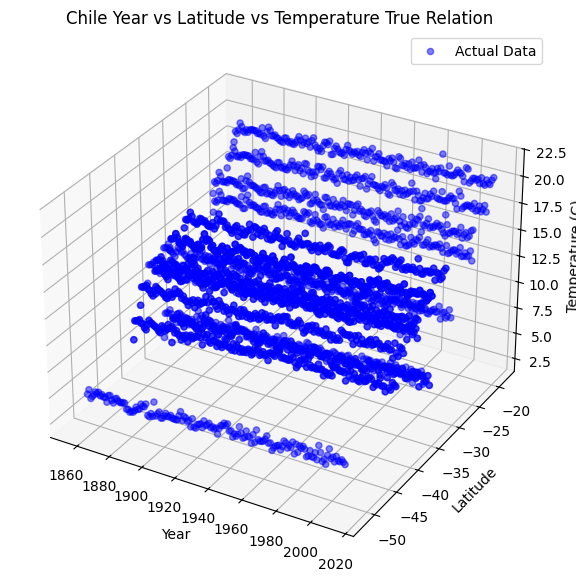

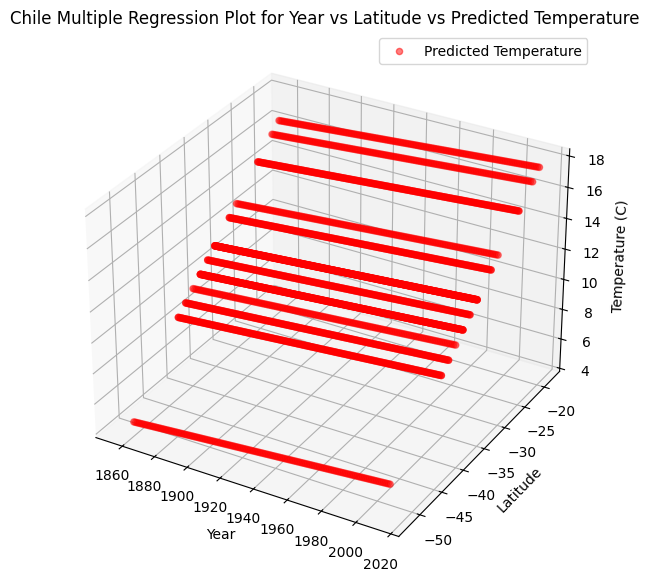

In [45]:
fig_true = plt.figure(figsize=(10, 7))
ax_true = fig_true.add_subplot(111, projection='3d')

# Plot the actual data points (year, latitude, and true average temperature)
ax_true.scatter(
    df_year['year'], 
    df_year['Latitude'], 
    df_year['AverageTemperature'],
    label='Actual Data', 
    color='blue', 
    alpha=0.5
)
ax_true.set_xlabel('Year')
ax_true.set_ylabel('Latitude')
ax_true.set_zlabel('Temperature (C)')
ax_true.legend()
ax_true.set_title(f"{train_country} Year vs Latitude vs Temperature True Relation")
plt.show()

fig_pred = plt.figure(figsize=(10, 7))
ax_pred = fig_pred.add_subplot(111, projection='3d')

# Plot predictions (from above multiple regression)
# X_train_year[:,0] is year and X_train_year[:,1] is latitude
ax_pred.scatter(
    X_train_year[:, 0], 
    X_train_year[:, 1], 
    Y_train_prediction_year.numpy().flatten(),
    label='Predicted Temperature', 
    color='red', 
    alpha=0.5
)
ax_pred.set_xlabel('Year')
ax_pred.set_ylabel('Latitude')
ax_pred.set_zlabel('Temperature (C)')
ax_pred.legend()
ax_pred.set_title(f"{train_country} Multiple Regression Plot for Year vs Latitude vs Predicted Temperature")
plt.show()
